In [ ]:
SANDBOX_NAME = 'fmex' # Sandbox Name
DATA_PATH = "/data/sandboxes/"+SANDBOX_NAME+"/data/"



# Función anónima "lambda"
La función anónima "lambda" se utiliza cuando necesitamos aplicar algún tipo de operación, normalmente de muy poco código, y no es necesario crear específicamente una función para ello.



Tenemos una función define una operación sencilla sobre un número.

In [ ]:
def divide_by_3(x):
    return x/3

divide_by_3(9)

3.0

In [ ]:
divide_by_3

<function __main__.divide_by_3(x)>



Se puede *re-definir* igualmente con lambda

In [ ]:
divide_by_3 = lambda x: x/3

divide_by_3(9)

3.0

In [ ]:
divide_by_3

<function __main__.<lambda>(x)>



Se pueden probar creando una función-expresion

In [ ]:
(divide_by_3)(9)

3.0

In [ ]:
(lambda x, y: x**y)(3, 4)

81



## Caracteristicas



### Devuelve el resultado de la operación indicada tras los dos puntos `:`



La función realiza una operación unica. (No una asignación ni definición)



### No permite asignar variables internamente

In [ ]:
lambda x: variable = 1

SyntaxError: can't assign to lambda (<ipython-input-8-3d0081336a47>, line 1)

In [ ]:
this_does_not_work = lambda x: variable = 1

SyntaxError: can't assign to lambda (<ipython-input-9-85d4a895fe35>, line 1)



### Accede al scope externo
Como en una función normal accede a variables del scope que le contiene, pero solo se ejecuta cuando se le llame

In [ ]:
executable_function = lambda x: variable+x

In [ ]:
executable_function(2)

NameError: name 'variable' is not defined

In [ ]:
variable = 10
executable_function(2)

12



### Una sola linea de código



El código minimo necesario



### No permite incrustar comentarios



# Aplicaciones sencillas



Se puede utilizar la signatura sin darle un nombre a la función en lugares donde haya que llamar a una función.

In [ ]:
my_list = list(range(1,10))

In [ ]:
result = []
for i in my_list:
    v = divide_by_3(i)
    result.append(v)
result

[0.3333333333333333,
 0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666667,
 2.0,
 2.3333333333333335,
 2.6666666666666665,
 3.0]



Con un list comprehension, la función normal se llamaría directamente

In [ ]:
[divide_by_3(x) for x in my_list]

[0.3333333333333333,
 0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666667,
 2.0,
 2.3333333333333335,
 2.6666666666666665,
 3.0]



Para Lambda no es necesario: solo hay que definir la parte de la operación. (La expresión tras `:`)

In [ ]:
[x/3 for x in my_list]

[0.3333333333333333,
 0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666667,
 2.0,
 2.3333333333333335,
 2.6666666666666665,
 3.0]



Con la función `map`, que aplica a cada elemento de una colección una función dada.

In [ ]:
list(map(lambda x : x/3, my_list))

[0.3333333333333333,
 0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666667,
 2.0,
 2.3333333333333335,
 2.6666666666666665,
 3.0]



En `map` también se puede indicar a que función NO ANÓNIMA llamar. Debe coincidir el argumento que recibe con los que espera.

In [ ]:
list(map(divide_by_3, my_list))

[0.3333333333333333,
 0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666667,
 2.0,
 2.3333333333333335,
 2.6666666666666665,
 3.0]



E incluso llamar a una función normal desde una función anónima.

In [ ]:
list(map(lambda x: divide_by_3(x), my_list))

[0.3333333333333333,
 0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666667,
 2.0,
 2.3333333333333335,
 2.6666666666666665,
 3.0]



Esto es útil para pasar argumentos especiales. Redefinamos la función divide, para que acepte como argumento el divisor.

In [ ]:
def divide_by(x, div=3):
    return x / div
divide_by(9)

3.0

In [ ]:
divide_by(9, div=2)

4.5

In [ ]:
list(map(lambda x: divide_by(x, div=5), my_list))

[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

In [ ]:
list(map(lambda x: divide_by(x, div = 2), my_list))

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

In [ ]:
import string

letters = string.ascii_letters

In [ ]:
list(map(lambda x: x[1], filter(lambda x: x[0] % 2 == 0, enumerate(letters))))

['a',
 'c',
 'e',
 'g',
 'i',
 'k',
 'm',
 'o',
 'q',
 's',
 'u',
 'w',
 'y',
 'A',
 'C',
 'E',
 'G',
 'I',
 'K',
 'M',
 'O',
 'Q',
 'S',
 'U',
 'W',
 'Y']



# Pueden tener varios argumentos



Utilizaremos la funcion especial `reduce`. Esta operación encadena secuencialmente una operación a los elementos de una colección. Comienza con el primero y el segundo y el resultado lo combina con el 
tercero y asi hasta el último. Definamos una función sencilla: suma

In [ ]:
from functools import reduce

In [ ]:
test = [1, 2, 3, 4, 5]

In [ ]:
reduce(lambda acc, x: acc + x, test)

15

In [ ]:
reduce(lambda x, y: divide_by(x, div=y), my_list)

In [ ]:
import random

[23,
 40,
 20,
 16,
 21,
 87,
 26,
 47,
 80,
 37,
 45,
 34,
 21,
 80,
 62,
 15,
 30,
 53,
 68,
 3,
 24,
 11,
 75,
 69,
 19,
 51,
 55,
 19,
 20,
 59]

In [ ]:
# usar reduce para obtener el valor maximo.
# hint: piensa en el codigo que usamos para obtener el maximo
import random
random.seed(12344321)
r_array = [random.randint(0, 100) for _ in range(30)]
r_array

[82,
 64,
 30,
 38,
 99,
 91,
 8,
 66,
 74,
 51,
 46,
 69,
 39,
 68,
 30,
 36,
 32,
 23,
 98,
 42,
 49,
 68,
 49,
 15,
 9,
 46,
 14,
 42,
 49,
 18]

In [ ]:
reduce(lambda max_, x: max_ if max_ > x else x, r_array)

99



# Generador de funciones



En Python las funciones son "Ciudadanos de primera clase" (*first class citizens*). Por ello se pueden manejar como si de objetos se tratase, por ejemplo devolviéndose en una función.

In [35]:
def power_maker(power):

    def new_power(value):
        return value**power
    
    return new_power


In [36]:
power_maker(3)(5)

125

In [37]:
power_of_3 = power_maker(3)

In [38]:
power_of_3(5)

125

In [39]:
def power_maker(power):
    return lambda value: value**power

In [40]:
import matplotlib.pyplot as plt
import numpy as np

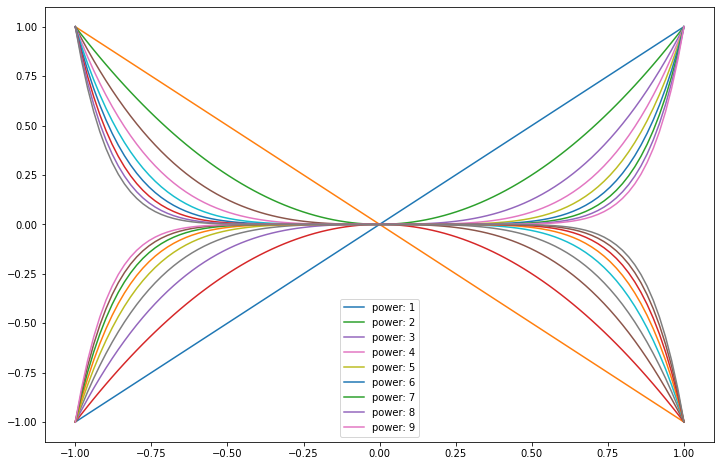

In [41]:
x = np.linspace(-1, 1, 100)
fig, ax = plt.subplots(figsize = (12, 8))
for power in range(1, 10):
    ax.plot(x, power_maker(power)(x), label=f'power: {power}')
    ax.plot(x, -power_maker(power)(x))
plt.legend()
plt.show()



## Ejercicios

In [42]:
from functools import reduce



### Ejercicio 1

Escribe un programa que filtre numeros pares en una lista (usando lambda)

La lista es [1,2,3,4,5,6,7,8,9,10].

La salida debería ser una lista con los números pares.

In [51]:
the_list = [1,2,3,4,5,6,7,8,9,10]
list(filter(lambda x: not x % 2, the_list))

[2, 4, 6, 8, 10]



Escribe un programa que cree una lista (usando lambda) cuyos elementos son el cuadrado de los elementos de la lista [1,2,3,4,5,6,7,8,9,10]

In [52]:
list(map(lambda x: x**2, the_list))

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]



Ahora escribe un programa que haga una lista (usando lambda) cuyos elementos sean el cuadrado de los números pares de la lista [1,2,3,4,5,6,7,8,9,10]

In [53]:
# Respuesta aqui
list(map(lambda x: x**2, filter(lambda x: not x % 2, the_list)))

[4, 16, 36, 64, 100]



### Ejercicio 2



Escribir código que determine el máximo de una lista de valores numéricos usando reduce

In [46]:
reduce(lambda acc, x: acc if acc > x else x, the_list)

10



### Ejercicio 3



Calcula la suma de los números del 1 al 100 (inclusives) usando sólo una línea de código

In [47]:
n = 100
print(n*(n+1)/2)
print(reduce(lambda x, y: x + y, range(n+1)))

5050.0
5050




### Ejercicio 4



Escriba un código que dadas las listas
- a = [1,2,3,4]
- b = [17,12,11,10]
- c = [-1,-4,5,9]
en una línea de código, imprima una lista conteniendo, en la posición i, la suma de los elementos de la posición i de la lista a, b y c.
Es decir, imprimiría [17, 10, 19, 23]

Escribe otra línea de código para que esta vez en vez de sumar los 3 elementos, la relación sea la siguiente: 2.5*x + 2*y - z, donde x, y, z son los elementos de la posición i de las listas a, b y c respectivamente.
Es decir, imprimiría [37.5, 33.0, 24.5, 21.0]

In [48]:
a = [1,2,3,4]
b = [17,12,11,10]
c = [-1,-4,5,9]

In [49]:
list(map(lambda x, y, z: x + y + z, a, b, c))

[17, 10, 19, 23]

In [50]:
list(map(lambda x, y, z: 2.5*x + 2*y - z, a, b, c))

[37.5, 33.0, 24.5, 21.0]